# Selection of "normal" surface flux year from Tamura and eraInterim datasets
The aim is select a suitable year that represents present day surface forcing for CABROMS. The Tamura surface fluxes are available from 1992-2016, but we are limited to the years 2005-2010 by the SOSE product (which we use for salt and heat flux correction). We do the statistics from 1992-2011 to get a representative climatology.
Subsequently do the same for wind stress from era interim and determine a year which does not stand out based on both comparisons . Select the same year. You can't simply use a climatology, since this would kill the high frequency signal in the forcing.

## Tamuras surface heat and salt fluxes
Loading the data (already monthly averages from year 1992-2011 preprocessed from raw data with matlab script read_tamura_daily_to_monthly.m) and explore it.

In [1]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

tamura_data_path = os.path.join(os.pardir,'data','preprocessing','external','tamura','1992-2011_Takeshi_subset_monthly.mat')
tamura_raw = sio.loadmat(tamura_data_path)

In [2]:
for key,value in tamura_raw.items():
    print(key, type(value),np.shape(value))

__header__ <class 'bytes'> ()
__version__ <class 'str'> ()
__globals__ <class 'list'> (0,)
shfluxtmp <class 'numpy.ndarray'> (721, 721, 240)
ssfluxtmp <class 'numpy.ndarray'> (721, 721, 240)


Create Xarray dataset with datetime coordinate

In [9]:
time = pd.date_range('1992-01',periods=np.size(tamura_raw['shfluxtmp'],-1),freq='M')
time_range = pd.period_range('1992-01',periods=np.size(tamura_raw['shfluxtmp'],-1),freq='M')
time_stamp = pd.Timestamp('1992-01')
tamura_ds = xr.Dataset({'shflux':(['X','Y','time'],tamura_raw['shfluxtmp']),
                        'ssflux':(['X','Y','time'],tamura_raw['ssfluxtmp'])},
                    coords={'time':(('time'),time),
                            'time_range':(('time'),time_range),
                            'reference_time':time_stamp})

Make climatology from area averages and calculate monthly anomalies

In [10]:
climatology = tamura_ds.mean(('X','Y')).groupby('time.month').mean('time')
anomalies = tamura_ds.mean(('X','Y')).groupby('time.month') - climatology

To for easy plotting: transfer to pandas dataframe and reorder data to year (1992,1993,...,2007) over month of year (1,2,3,...,12)

In [11]:
anom_df = anomalies.to_dataframe()
anom_df['year'] = anom_df.index.year
anom_df['monthOfYear'] = anom_df.index.month
anom_df = anom_df.pivot(index='monthOfYear',columns='year')

Plot all years on top of each other

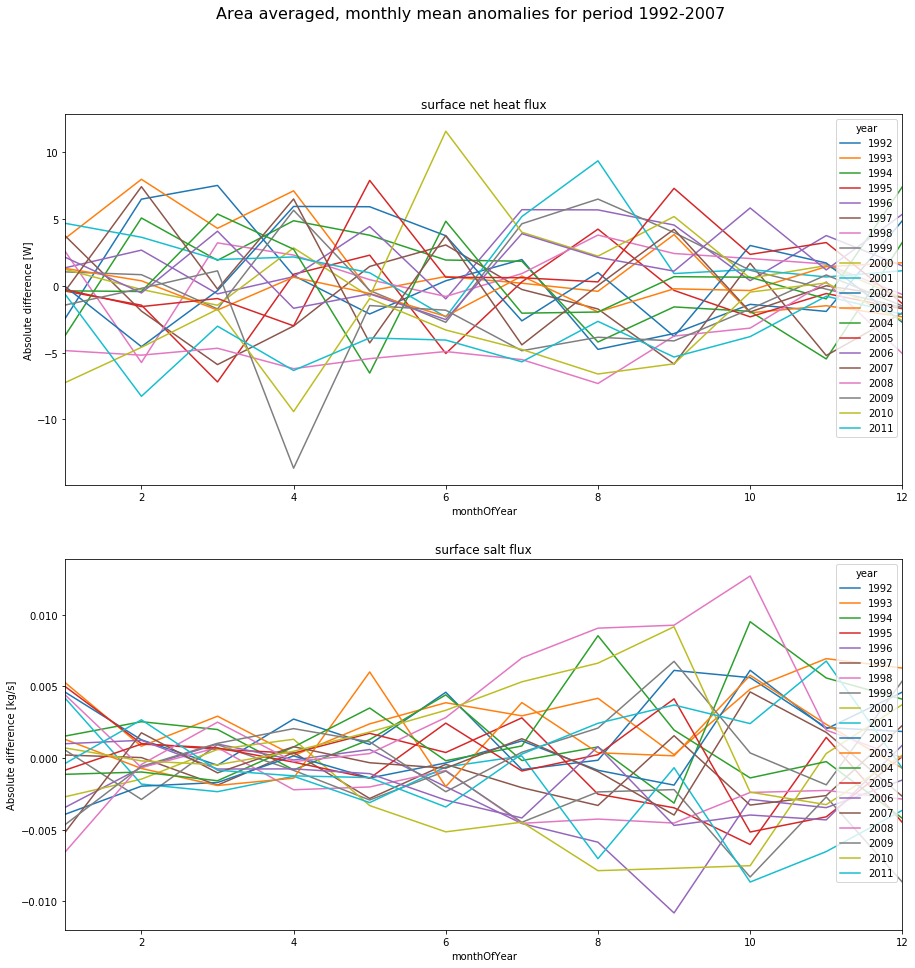

In [12]:
plt.clf()
fig,(ax1,ax2) = plt.subplots(2,figsize=(15,15))
plt.suptitle('Area averaged, monthly mean anomalies for period 1992-2007',fontsize=16)
anom_df['shflux'].plot(ax=ax1)
ax1.set_title('surface net heat flux')
ax1.set_ylabel('Absolute difference [W]')
anom_df['ssflux'].plot(ax=ax2)
ax2.set_title('surface salt flux')
ax2.set_ylabel('Absolute difference [kg/s]')

plt.show()

Display statistics of each year

In [13]:
anom_df['shflux'].describe()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.496031,1.764407,0.494254,-0.937114,2.439466,-1.321920,1.023547,1.439654,2.154419,2.474257,0.612167,-0.071863,0.791753,1.278463,1.710409,0.828322,-4.644108,-2.717654,-3.936646,-3.877844
std,3.995003,3.513532,3.693448,3.044262,2.369899,3.346216,2.560914,3.069787,3.600956,2.951572,3.602748,1.368931,3.819475,3.403192,2.723955,3.862516,1.881916,3.902941,2.983432,2.258547
min,-4.749725,-2.309119,-5.465113,-7.189890,-0.969037,-5.889168,-5.733909,-2.724962,-1.444308,-2.323937,-4.545138,-2.276661,-6.525830,-2.987818,-2.515656,-4.410439,-7.306162,-13.648298,-9.408295,-8.264208
25%,-2.177642,-0.671547,-2.348515,-1.858336,0.619007,-3.552699,0.190974,-0.656141,-0.395357,0.971147,-2.642253,-0.871957,-1.214009,-1.035840,-0.542641,-1.133211,-5.461121,-3.909423,-6.021839,-5.412331
50%,-0.493837,0.455943,1.886222,-0.475801,2.093047,-1.803579,1.846693,0.948119,1.382493,1.602207,0.478003,0.085749,0.143999,0.460316,1.674389,-0.109166,-4.986858,-1.613019,-3.948266,-3.843898
75%,2.705615,3.962579,3.402211,0.447663,4.478203,1.520669,2.466070,4.164682,3.142534,3.908688,3.213199,0.883181,3.276537,2.586368,3.961541,3.890840,-4.437749,-1.114702,-1.546239,-2.519078
max,7.529621,7.987491,5.090230,4.256692,5.712499,3.740902,3.811356,6.505804,11.587107,9.372362,5.955016,1.737908,7.427822,7.905071,5.840999,7.433963,0.304232,1.132264,0.223110,-0.641870


In [14]:
anom_df['ssflux'].describe()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.002367,0.003402,0.002303,-0.000265,-0.002811,-0.000994,-0.001789,-0.002898,-0.002847,-0.002611,0.000173,0.001093,0.000493,-0.000339,-0.001562,-0.000372,0.003201,0.000816,0.001779,0.000861
std,0.002387,0.002245,0.003304,0.003211,0.003265,0.001917,0.002521,0.003019,0.003847,0.003518,0.002897,0.002830,0.003186,0.002524,0.002326,0.002704,0.005363,0.003141,0.003690,0.002795
min,-0.000800,0.000182,-0.003140,-0.006027,-0.010803,-0.003304,-0.004551,-0.008652,-0.007852,-0.008646,-0.003915,-0.001986,-0.004200,-0.005156,-0.004698,-0.005154,-0.006535,-0.004631,-0.003248,-0.003410
25%,0.000678,0.001997,0.000540,-0.002753,-0.003733,-0.002666,-0.003209,-0.003312,-0.005735,-0.004361,-0.001748,-0.000892,-0.001194,-0.001026,-0.004022,-0.001439,-0.000052,-0.000899,-0.000262,-0.000944
50%,0.001991,0.003405,0.001766,0.000499,-0.002440,-0.001162,-0.002233,-0.002535,-0.003004,-0.002078,-0.000594,0.000266,-0.000214,-0.000086,-0.000924,-0.000514,0.002230,0.000720,0.000590,-0.000043
75%,0.004592,0.004918,0.004186,0.001515,-0.000526,0.000258,-0.000811,-0.000893,0.000391,-0.000659,0.001409,0.002734,0.001125,0.000776,0.000823,0.001454,0.007504,0.002064,0.003831,0.002489
max,0.006118,0.006938,0.009515,0.004982,0.000985,0.002277,0.004396,0.000933,0.003732,0.004162,0.006125,0.006009,0.008537,0.004133,0.001242,0.004616,0.012702,0.006750,0.009161,0.006770


##  EraInterim surface stress
Load data with Xarray and select to southern ocean 1992-2011

In [76]:
import xarray as xr
import pandas as pd

In [16]:
path_era = os.path.join(os.pardir,'data','external','eraInterim','ERA_Interim_1992_2011.2daily.?winds.nc')
era_ds = xr.open_mfdataset(path_era,data_vars='minimal').sel(time=slice('1992-01-01T00:00:00','2011-12-31T23:00:00'),latitude=slice(-40,-75))

calculate daily mean, since this is what you apply to roms

In [17]:
era_ds = era_ds.resample(time='1D').mean()

<xarray.DataArray 'time' ()>
array(1293840000000000000, dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2011-01-01

Make climatology from area averages and calculate daily anomalies

In [18]:
climatology = era_ds.mean(("latitude",'longitude')).groupby('time.day').mean('time')
anomaly = era_ds.mean(("latitude",'longitude')).groupby('time.day') - climatology

To for easy plotting: transfer to pandas dataframe and reorder data to year (2005,2006,...,2010) over day of year (1,2,3,...,365)

In [19]:
anom_df = anomaly.to_dataframe()
anom_df['year'] = anom_df.index.year
anom_df['dayOfYear'] = anom_df.index.dayofyear
anom_df = anom_df.pivot(index='dayOfYear',columns='year')

Plot all years on top of each other

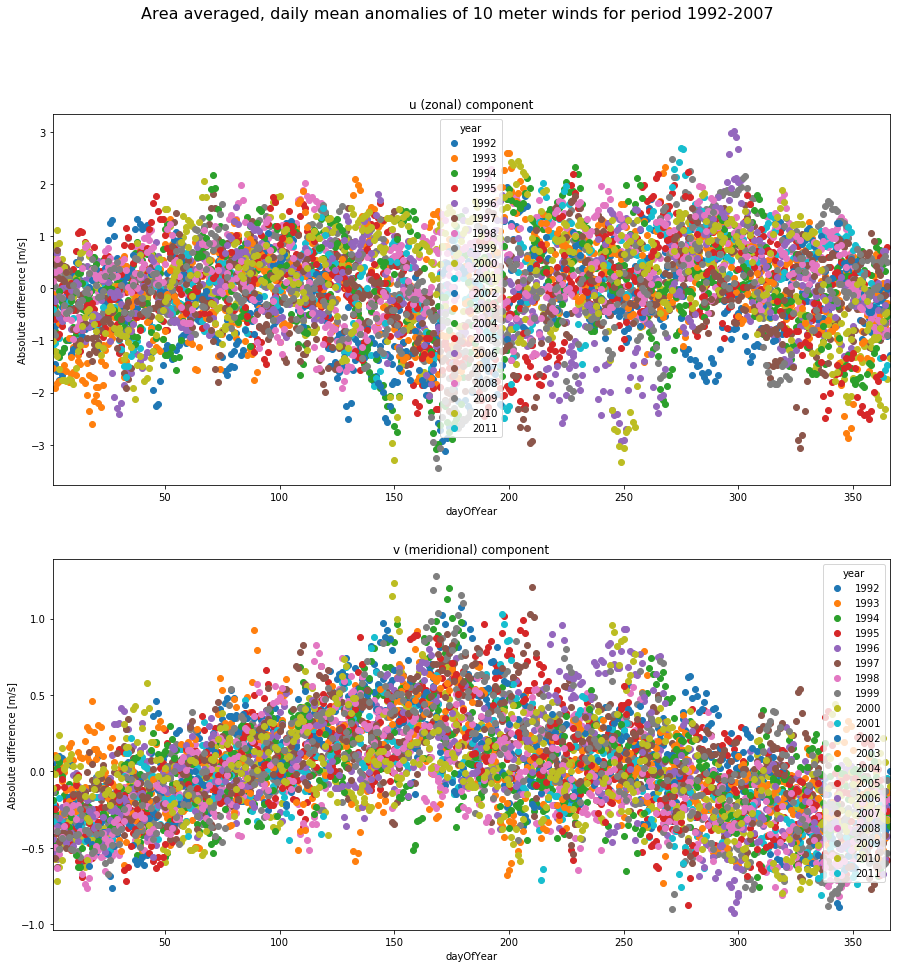

In [20]:
plt.clf()
fig,(ax1,ax2) = plt.subplots(2,figsize=(15,15))
plt.suptitle('Area averaged, daily mean anomalies of 10 meter winds for period 1992-2007',fontsize=16)
anom_df['u10'].plot(ax=ax1,linestyle='',marker='o')
ax1.set_title('u (zonal) component')
ax1.set_ylabel('Absolute difference [m/s]')
anom_df['v10'].plot(ax=ax2,linestyle='',marker='o')
ax2.set_title('v (meridional) component')
ax2.set_ylabel('Absolute difference [m/s]')
plt.show()

Display statistics of each year

In [21]:
anom_df['u10'].describe()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,1.000000
mean,-0.282441,0.213876,-0.115780,-0.038339,-0.180525,-0.085618,0.519959,0.337256,-0.142506,0.175553,-0.326982,-0.151380,0.093482,-0.118492,0.059161,-0.264129,0.199520,-0.239780,0.349107,-0.396113
std,0.940127,0.926108,1.054313,0.990388,0.949236,0.843279,0.738994,0.928441,1.004965,0.892932,0.868630,0.931816,0.881395,0.931635,0.905502,0.837330,0.738558,0.838251,0.967675,NaN
min,-3.120913,-2.602803,-3.074628,-2.453795,-2.931268,-3.062058,-1.266227,-3.447685,-3.327528,-2.477971,-2.555831,-2.870559,-1.889368,-2.495778,-2.589507,-2.974440,-1.916832,-2.670633,-2.122712,-0.396113
25%,-0.885918,-0.295364,-0.798073,-0.643187,-0.787604,-0.556275,-0.067381,-0.188281,-0.726582,-0.331291,-0.984332,-0.807095,-0.485720,-0.714302,-0.518770,-0.755671,-0.293538,-0.672174,-0.370636,-0.396113
50%,-0.206390,0.359111,0.070454,0.082370,-0.088361,-0.044590,0.557747,0.350667,-0.082774,0.265754,-0.279888,-0.213944,0.028451,-0.122656,0.022021,-0.208177,0.241338,-0.174835,0.501961,-0.396113
75%,0.298942,0.839450,0.592605,0.638064,0.436912,0.451533,1.083571,0.979425,0.580879,0.790265,0.351316,0.469371,0.749753,0.623546,0.777861,0.290502,0.752235,0.295286,1.089838,-0.396113
max,1.948442,2.596633,2.328919,2.195998,3.010672,1.799800,2.289531,2.248864,1.776818,2.690399,1.329196,2.102493,2.171233,2.230815,2.120300,1.762697,1.964330,2.471722,2.449166,-0.396113


In [22]:
anom_df['v10'].describe()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,365.000000,366.000000,365.000000,365.000000,1.000000
mean,0.071859,-0.013752,0.058567,0.050643,0.075753,0.063233,-0.118914,-0.048198,-0.000233,-0.066201,0.047022,0.005448,-0.054464,-0.001867,-0.036027,0.056233,-0.078918,0.039685,-0.049027,-0.321738
std,0.333778,0.306375,0.372447,0.387172,0.337086,0.276546,0.304345,0.397389,0.338416,0.339819,0.375717,0.287757,0.262007,0.310102,0.351901,0.381190,0.331820,0.361992,0.286828,NaN
min,-0.612293,-0.730113,-0.683013,-0.692880,-0.926235,-0.552252,-0.813456,-0.880912,-0.719020,-0.810798,-0.888151,-0.614238,-0.753710,-0.872637,-0.817685,-0.766652,-0.761630,-0.900248,-0.793682,-0.321738
25%,-0.170751,-0.214699,-0.206304,-0.276349,-0.159713,-0.126701,-0.333818,-0.343967,-0.235157,-0.302676,-0.212744,-0.207993,-0.246868,-0.182577,-0.312664,-0.171305,-0.309052,-0.247692,-0.249162,-0.321738
50%,0.026554,-0.023045,-0.005840,0.004980,0.057357,0.050637,-0.137213,-0.052403,-0.036770,-0.105336,0.057731,-0.017358,-0.048976,-0.016269,-0.089250,0.063177,-0.123942,0.005252,-0.029575,-0.321738
75%,0.285222,0.183210,0.270388,0.319668,0.292221,0.222800,0.111343,0.208424,0.195210,0.131274,0.342048,0.203406,0.132303,0.214769,0.187824,0.288485,0.153818,0.315440,0.149673,-0.321738
max,1.073198,0.923906,1.198151,1.017803,0.935047,0.901403,0.627889,1.279117,1.232477,1.027595,0.972290,0.686933,0.699753,0.876852,0.957764,1.207550,0.826580,1.154874,0.737845,-0.321738


## Conclusion: 2007
I select the year 2007 as suitable due to its low mean value in surface heat flux and acceptable statistics in all other fields.  